# <font color='green' style='font-size: 30px backgound =;'> Data Visualization: Explorando com Seaborn </font>
<hr style='border: 2px solid green;'>


<div>Foi realizado análise em cima de amostras de refeições, realizadas em um suposto restaurante/lanchonete, onde foi analisado o ganho das gorjetas.
</br></br>
=> Será que se maior o valor da compra, maior será o valor da gorjeta? </br>
=> A porcentagem da gorjeta e de acordo com o gasto realizado? </br>
=> Quem pede sobremesa e provavél pagar uma gorejata maior? </br>
=> Algum dia da semana em que as pessoas dão mais gorjetas?  </br>
=> Perodo almoço| jantar interfere da diferença de gorjeta?</br>
=> É gasto mais no almoço ou na janta?
</div>

##### 01- Importando e traduzindo os dados

In [162]:
import pandas as pd
import seaborn as sns 
from scipy.stats import ranksums

In [163]:
dados = pd.read_csv('tips.csv')

In [164]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


###### TRADUZINDO CAMPOS E COLUNAS

In [165]:
#Verificado os nomes atuais das colunas

dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [166]:
#Renomeando arquivos 

renomear = {
'total_bill': 'valor_da_conta',
'tip': 'gorjeta',
'dessert': 'sobremesa',
'day': 'dia_da_semana', 
'time': 'hora_do_dia',
'size': 'total_de_pessoa'}

In [167]:
type(dados)

pandas.core.frame.DataFrame

In [168]:
gorjetas = dados.rename(columns=renomear)

Alterando Sim e Não

In [169]:
gorjetas.head(2)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3


###### Alterando campo gorjeta

In [170]:
#Verificando valores unicos

gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [171]:
#Renomeando

sim_nao = {
    'No': 'Não',
    'Yes': 'Sim'
}

In [172]:
#Mapeando 

gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [173]:
#Atribuindo o mapa a variável

gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [174]:
#Verificando atualização

gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [175]:
gorjetas.sobremesa.unique()

array(['Não', 'Sim'], dtype=object)

###### Alterando campo dias da semana

In [176]:
#Visualizando os dias da semana que aparece

gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [177]:
#Renomeando 

dias = {
   'Sun':'Domingo',
   'Sat': 'Sábado',
   'Thur': 'Quinta',
   'Fri':'sexta'
}

In [178]:
#Atribuindo o mapa a variável

gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [179]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [180]:
#visualizando alteração

gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'sexta'], dtype=object)

###### Alterando campo Hora do dia 

In [181]:
#Visualizando refeições que aparece

gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [182]:
#Renomeando

hora = {
    'Dinner':'Jantar',
    'Lunch': 'Almoço'
}

In [183]:
#Atribuindo o mapa a variável

gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [184]:
#Visualizando alteração

gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [185]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

##### 02- Comparando distribuições de maneiras exploratória

2.1 Seaborn e catterplot

Será que o valor da compra influência no valor da gorjeta?

In [186]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoa'],
      dtype='object')

Aparenta uma progressão linear: o valor da gorjeta aumenta conforme aumenta o valor da conta

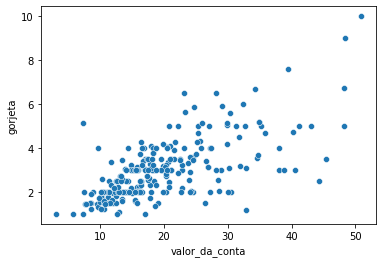

In [187]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

In [188]:
gorjetas.shape[0]

244

In [189]:
print('A base de dados contém {} registros'.format(gorjetas.shape[0])) 


A base de dados contém 244 registros


In [190]:
print('Registros não nulos')
gorjetas.count()

Registros não nulos


valor_da_conta     244
gorjeta            244
sobremesa          244
dia_da_semana      244
hora_do_dia        244
total_de_pessoa    244
dtype: int64

2.2 -Coluna porcentagem

In [191]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


Adicionando um novo campo porcetagem (Dividindo a gorgeta pelo valor da compra)


In [192]:
gorjetas['porcentagem'] = gorjetas['gorjeta']/gorjetas['valor_da_conta']

In [193]:
gorjetas.head(2)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542


In [194]:
#arrendodando

gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [195]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


Visualmente o valor da conta não é proporcional ao valor da gorjeta

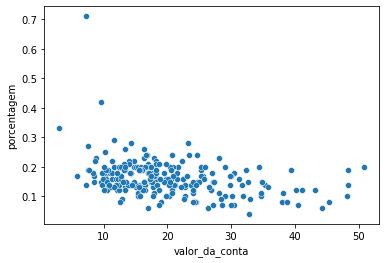

In [196]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

2.3- Relplot e Implot

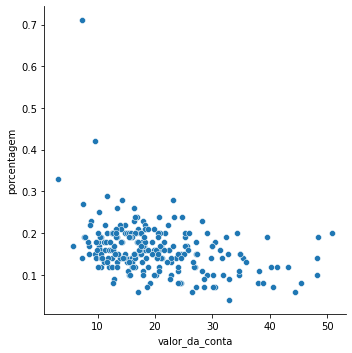

In [197]:
#Gráfico em formato de linha

porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

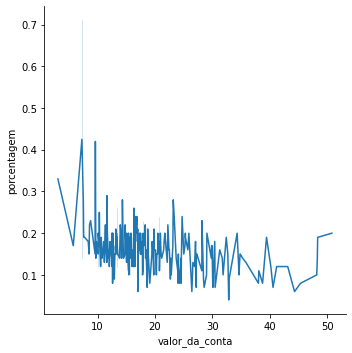

In [198]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line' , data=gorjetas)

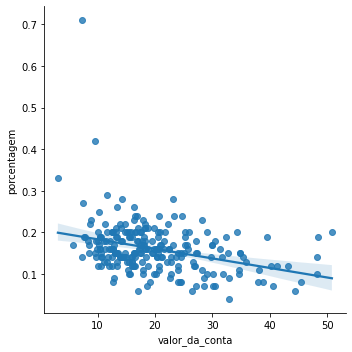

In [199]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

##### 03-  Analisando de forma visual e descritiva

3.1 Análise descritiva

??? Será qu pedir gojeta influência na gorjeta?

In [200]:
gorjetas[gorjetas.sobremesa =='Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [201]:
gorjetas[gorjetas.sobremesa =='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoa,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [202]:
gorjetas[gorjetas.sobremesa =='Não']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
235,10.07,1.25,Não,Sábado,Jantar,2,0.12
238,35.83,4.67,Não,Sábado,Jantar,3,0.13
239,29.03,5.92,Não,Sábado,Jantar,3,0.20
242,17.82,1.75,Não,Sábado,Jantar,2,0.10


In [203]:
gorjetas[gorjetas.sobremesa =='Não']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
235,10.07,1.25,Não,Sábado,Jantar,2,0.12
238,35.83,4.67,Não,Sábado,Jantar,3,0.13
239,29.03,5.92,Não,Sábado,Jantar,3,0.20
242,17.82,1.75,Não,Sábado,Jantar,2,0.10


3.2 Análise visual

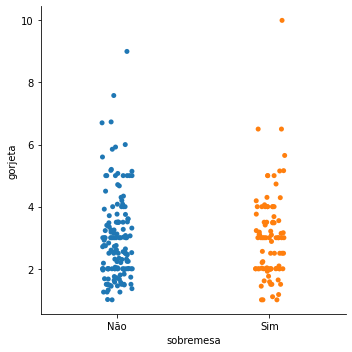

In [204]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

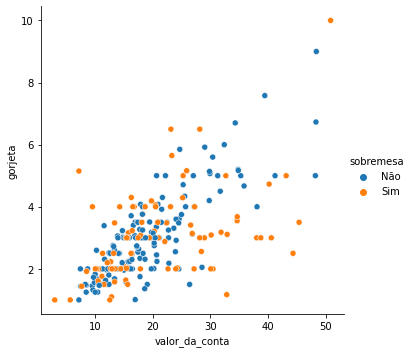

In [205]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

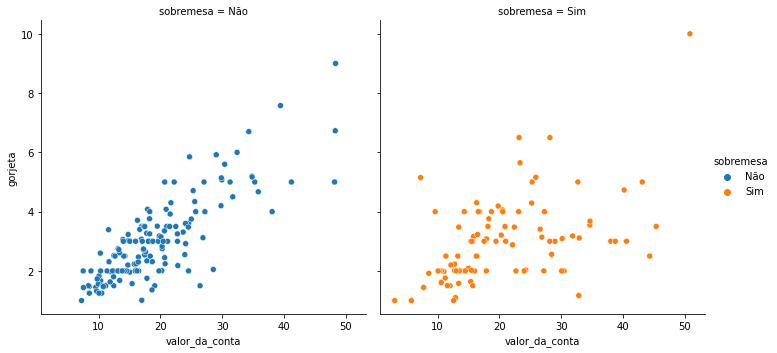

In [206]:
#Os dois gráficos um ao lado do outros separado

sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

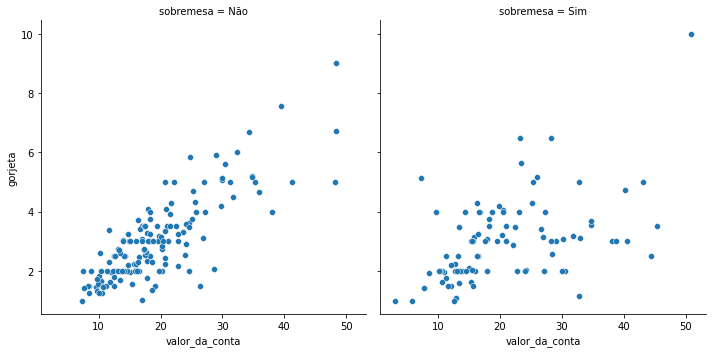

In [207]:
#Ambos na mesma cor
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

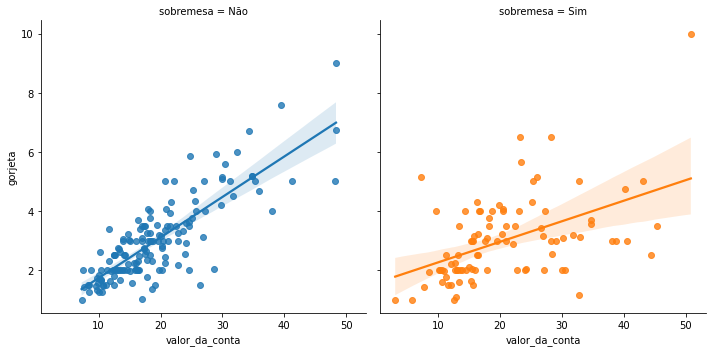

In [208]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

Visualmente existe uma diferença entre aqueles que pediram gorjeta e não pediram

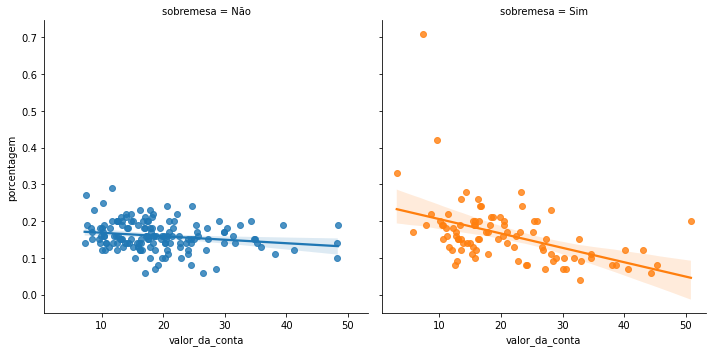

In [209]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

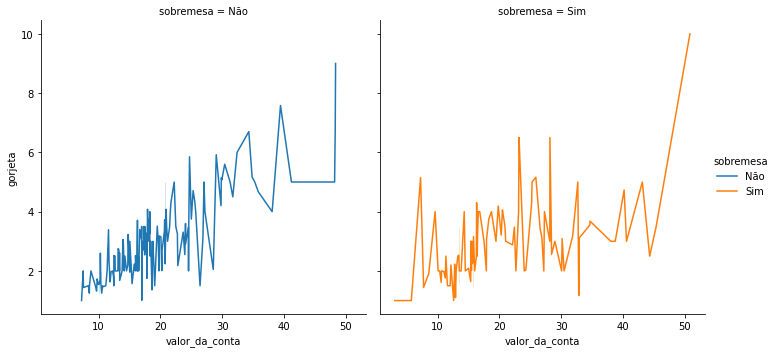

In [210]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

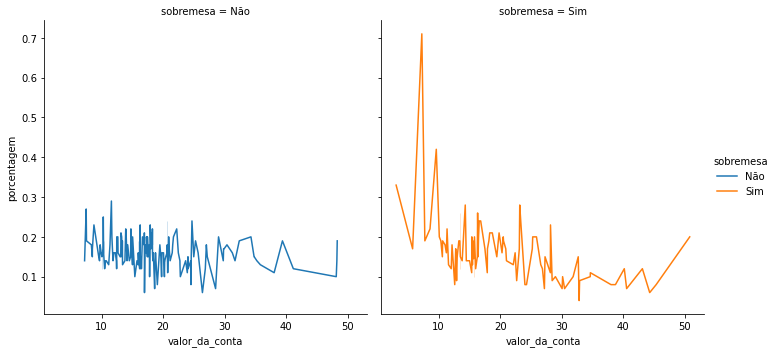

In [211]:
sns.relplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

3.3 tete de hipótese

<div>
Ipotese nula </br></br>
H<sup>null</sup></br>
A distribuição da taxa da gorjeta é a mesma nos dois grupos</br></br>
H<sup>alt</sup></br>
A distribuição da taxa da gorjeta não é a mesma nos dois grupos
</br>
</div>

In [212]:
from scipy.stats import ranksums

In [213]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [214]:
sobremesa

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [215]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [216]:
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: porcentagem, Length: 151, dtype: float64

In [217]:
r = ranksums(sobremesa, sem_sobremesa)

In [218]:
r

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [219]:
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.5266635660124415


H<sup>null</sup></br>
A distribuição da taxa da gorjeta é a mesma nos dois grupos</br>

##### 04 - Comparando e explorando os dias da semana

4.1 Dias da semana

In [220]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


=> Algum dia da semana em que as pessoas dão mais gorjetas?

In [223]:
gorjetas.dia_da_semana.describe()

count        244
unique         4
top       Sábado
freq          87
Name: dia_da_semana, dtype: object

In [225]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'sexta'], dtype=object)

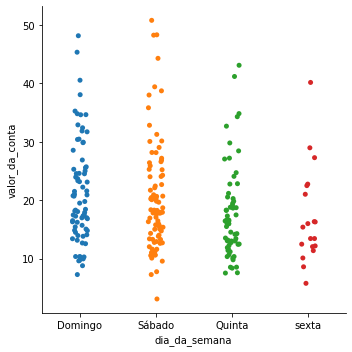

In [229]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data =gorjetas)

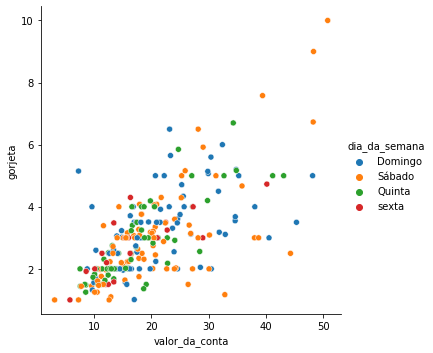

In [232]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data =gorjetas)

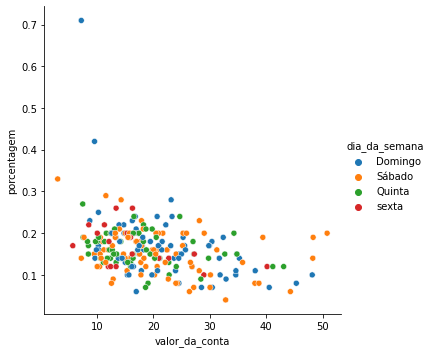

In [233]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data =gorjetas)

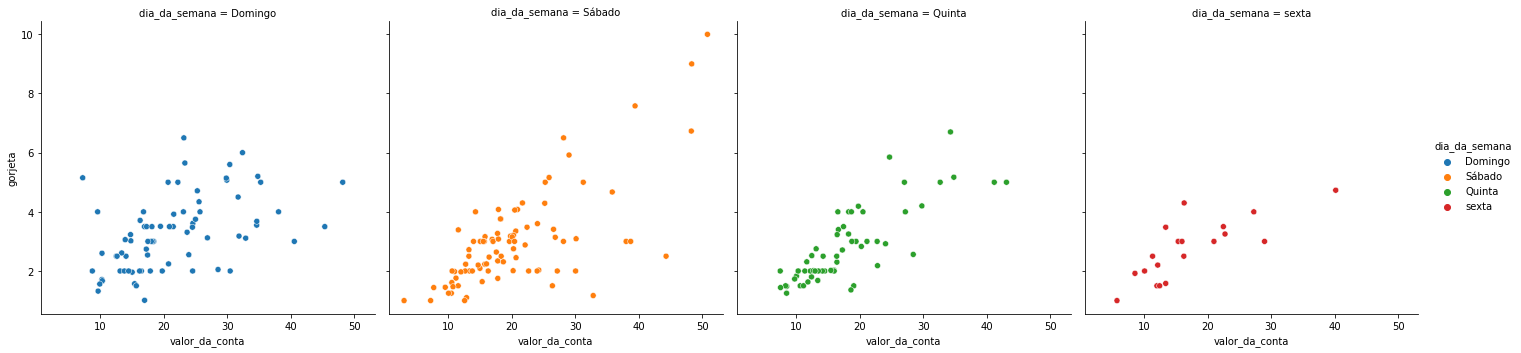

In [234]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana',col='dia_da_semana', data =gorjetas)

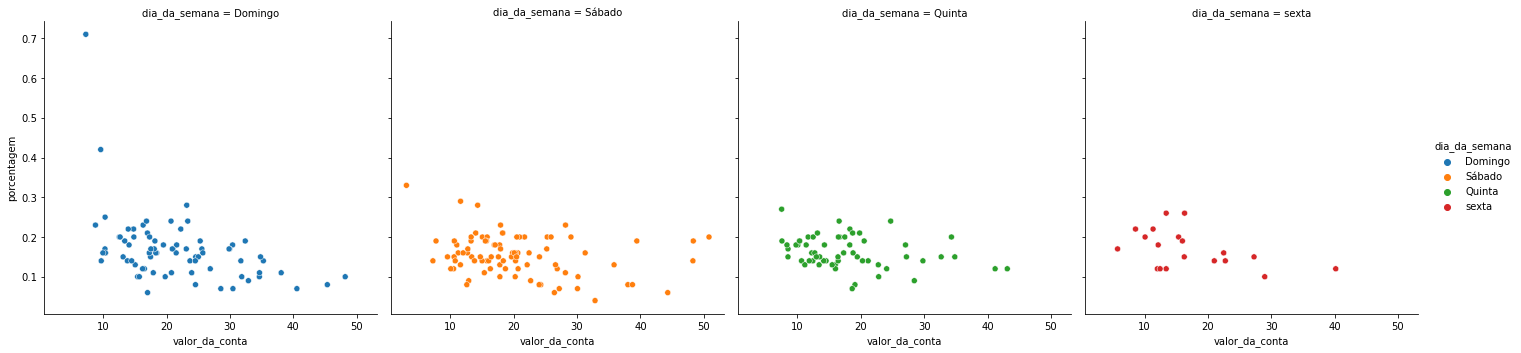

In [238]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana',col='dia_da_semana', data =gorjetas)

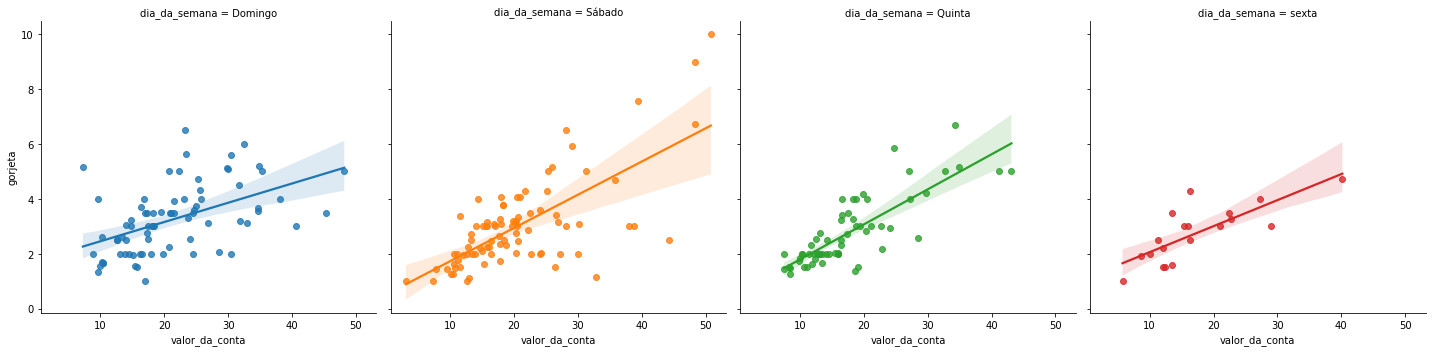

In [241]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana',col='dia_da_semana', data =gorjetas)

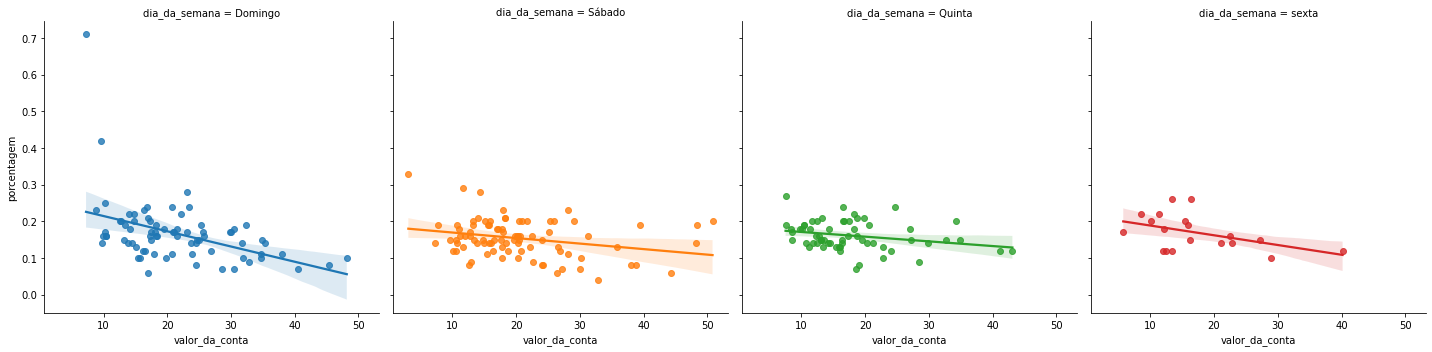

In [242]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana',col='dia_da_semana', data =gorjetas)

4.2 Análise descritiva

In [250]:
media_geral_gorjeta = gorjetas.gorjeta.mean()

In [251]:
media_geral_gorjeta

2.9982786885245902

In [249]:
print(f'A média gral das gorjetas é {media_geral_gorjeta:.2f}')

A média gral das gorjetas é 3.00


In [254]:
#Média da semana

gorjetas.groupby(['dia_da_semana']).mean().round(2)

,valor_da_conta,gorjeta,total_de_pessoa,porcentagem
dia_da_semana,,,,
Domingo,21.41,3.26,2.84,0.17
Quinta,17.68,2.77,2.45,0.16
Sábado,20.44,2.99,2.52,0.15
sexta,17.15,2.73,2.11,0.17


In [256]:
#Média da semana , selecionando apenas os itens que deseja que apareça

gorjetas.groupby(['dia_da_semana']).mean().round(2)[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.41,3.26,0.17
Quinta,17.68,2.77,0.16
Sábado,20.44,2.99,0.15
sexta,17.15,2.73,0.17


In [258]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
sexta      19
Name: dia_da_semana, dtype: int64

4.3 Teste de hipótese

<div>
H<sup>null</sup></br>
A distribuição do valor da conta é igual no sábado e no domingo</br></br>

H<sup>alt</sup></br>
A distribuição do valor da conta não é igual no sábado e no domingo
</br>
</div>

In [263]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [265]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [272]:
r2= ranksums(valor_conta_sabado , valor_conta_domingo)

<div>
H<sup>null</sup></br>
Ficamos com a hipotese nula: A distribuição do valor da conta é igual no sábado e no domingo
</div>

In [274]:
print(f'O valor do p-value é {r2.pvalue}')

O valor do p-value é 0.3576728477868443


##### 05- Distribuição de frequência e teste de hipótese

5.1 - Distplot, boxplot e violinplot

In [276]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [278]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

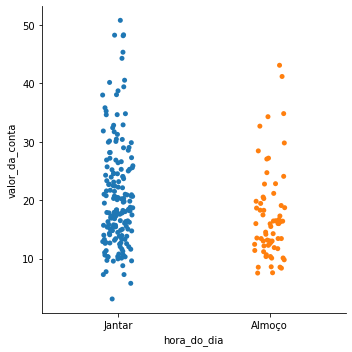

In [279]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

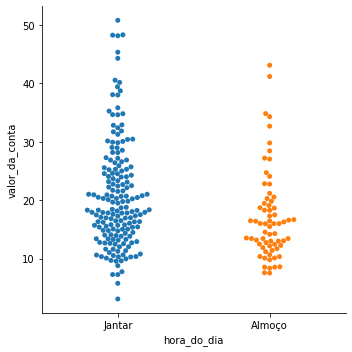

In [282]:
sns.catplot(x='hora_do_dia', y='valor_da_conta',kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

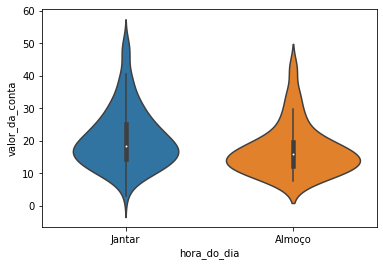

In [284]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

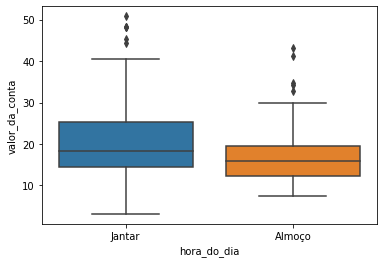

In [285]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [286]:
#histograma
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

C:\Users\aline\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

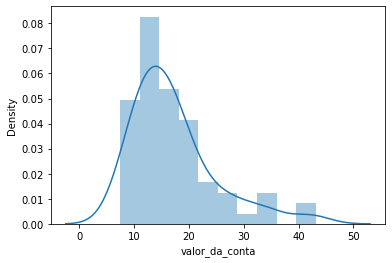

In [290]:
sns.distplot(almoco)

<AxesSubplot:xlabel='valor_da_conta'>

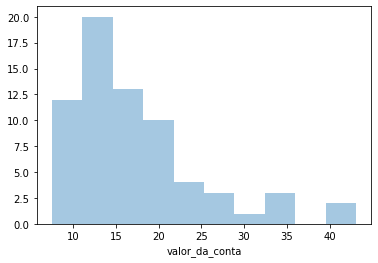

In [296]:
sns.distplot(almoco, kde=False)

In [292]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

C:\Users\aline\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

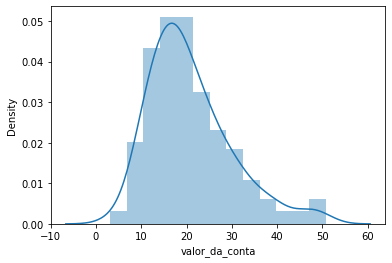

In [293]:
sns.distplot(jantar)

C:\Users\aline\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

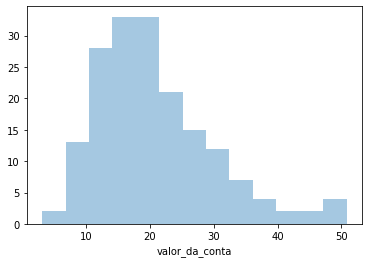

In [295]:
sns.distplot(jantar, kde=False)

5.2 - teste de hipótese 2

In [298]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


<div>
H<sup>null</sup></br>
A distribuição do valor da conta é igual no jantar e no almoço</br></br>

H<sup>alt</sup></br>
A distribuição do valor da conta não é igual no jantar e no almoço
</br>
</div>

In [317]:
print('''podemos ficar com a hipotese alternativa : 
A distribuição do valor da conta não é igual no jantar e no almoço''')

podemos ficar com a hipotese alternativa : 

A distribuição do valor da conta não é igual no jantar e no almoço


In [304]:
r3 = ranksums(jantar, almoco)

<div>
H<sup>null</sup></br>
A distribuição da taxa da gorjeta é igual no jantar e no almoço</br></br>

H<sup>alt</sup></br>
A distribuição da taxa da gorjeta é igual no jantar e no almoço
</br>
</div>

In [306]:
print(f'O valor do p-value é {r3.pvalue}')

O valor do p-value é 0.0011791039723641672


In [309]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [311]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [319]:
r4= ranksums (porcentagem_almoco,porcentagem_jantar )

In [318]:
print('A distribuição da taxa da gorjeta é igual no jantar e no almoço')

A distribuição da taxa da gorjeta é igual no jantar e no almoço


In [321]:
print(f'O valor do p-value é {r4.pvalue}')

O valor do p-value é 0.2602493995587126
